In [ ]:
import os, cv2, random, time, shutil, csv


In [ ]:
!wget --no-check-certificate \
    https://drive.google.com/file/d/1kAEnzFl6cbSUoUw3ML39b3qM6_GoXBHS/view?usp=sharing \
-O /content/Birds-Dataset.zip.zip

--2021-03-04 18:29:47--  https://drive.google.com/file/d/1kAEnzFl6cbSUoUw3ML39b3qM6_GoXBHS/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.142.102, 74.125.142.101, 74.125.142.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/Birds-Dataset.zip.zip’

/content/Birds-Data     [ <=>                ]  61.82K  --.-KB/s    in 0.03s   

2021-03-04 18:29:47 (2.37 MB/s) - ‘/content/Birds-Dataset.zip.zip’ saved [63307]



In [ ]:
import os
import zipfile


local_zip = '/content/Birds-Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#set up the cat and dog training and validation directories
base_dir = '/tmp/Birds-Dataset/'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
print(os.listdir(base_dir))


['.DS_Store', 'Validation', 'Train']


In [ ]:
# Directory with our training cat and dog pictures
train_flame_dir = os.path.join(train_dir, 'FLAME TANAGER')
train_finch_dir = os.path.join(train_dir, 'GOULDIAN FINCH')
train_indigo_dir = os.path.join(train_dir, 'INDIGO BUNTING')
train_lilac_dir = os.path.join(train_dir, 'LILAC ROLLER')
train_kingfisher_dir = os.path.join(train_dir, 'MALACHITE KINGFISHER')
train_pigeon_dir = os.path.join(train_dir, 'NICOBAR PIGEON')
train_buntig_dir = os.path.join(train_dir, 'PAINTED BUNTIG')
train_peacock_dir = os.path.join(train_dir, 'PEACOCK')
train_lorikeet_dir = os.path.join(train_dir, 'RAINBOW LORIKEET')
train_magpie_dir = os.path.join(train_dir, 'TAIWAN MAGPIE')

# Directory with our validation cat and dog pictures
validation_flame_dir = os.path.join(validation_dir, 'FLAME TANAGER')
validation_finch_dir = os.path.join(validation_dir, 'GOULDIAN FINCH')
validation_indigo_dir = os.path.join(validation_dir, 'INDIGO BUNTING')
validation_lilac_dir = os.path.join(validation_dir, 'LILAC ROLLER')
validation_kingfisher_dir = os.path.join(validation_dir, 'MALACHITE KINGFISHER')
validation_pigeon_dir = os.path.join(validation_dir, 'NICOBAR PIGEON')
validation_buntig_dir = os.path.join(validation_dir, 'PAINTED BUNTIG')
validation_peacock_dir = os.path.join(validation_dir, 'PEACOCK')
validation_lorikeet_dir = os.path.join(validation_dir, 'RAINBOW LORIKEET')
validation_magpie_dir = os.path.join(validation_dir, 'TAIWAN MAGPIE')



In [ ]:
#verify the first 10 frams name of cat and dog list 
train_flame_fnames = os.listdir(train_flame_dir)
print(train_flame_fnames[:10])

train_finch_fnames = os.listdir(train_finch_dir)
print(train_finch_fnames[:10])

train_indigo_fnames = os.listdir(train_indigo_dir)
print(train_indigo_fnames[:10])

train_lilac_fnames = os.listdir(train_lilac_dir)
print(train_lilac_fnames[:10])

train_kingfisher_fnames = os.listdir(train_kingfisher_dir)
print(train_kingfisher_fnames[:10])

train_pigeon_fnames = os.listdir(train_pigeon_dir)
print(train_pigeon_fnames[:10])

train_buntig_fnames = os.listdir(train_buntig_dir)
print(train_buntig_fnames[:10])

train_peacock_fnames = os.listdir(train_peacock_dir)
print(train_peacock_fnames[:10])

train_lorikeet_fnames = os.listdir(train_lorikeet_dir)
print(train_lorikeet_fnames[:10])

train_magpie_fnames = os.listdir(train_magpie_dir)
print(train_magpie_fnames[:10])



['079.jpg', '039.jpg', '026.jpg', '022.jpg', '113.jpg', '056.jpg', '033.jpg', '073.jpg', '105.jpg', '086.jpg']
['079.jpg', '039.jpg', '026.jpg', '022.jpg', '113.jpg', '056.jpg', '033.jpg', '073.jpg', '105.jpg', '086.jpg']
['079.jpg', '039.jpg', '026.jpg', '022.jpg', '113.jpg', '056.jpg', '033.jpg', '073.jpg', '105.jpg', '086.jpg']
['079.jpg', '039.jpg', '026.jpg', '022.jpg', '113.jpg', '056.jpg', '033.jpg', '073.jpg', '105.jpg', '086.jpg']
['079.jpg', '039.jpg', '026.jpg', '022.jpg', '113.jpg', '056.jpg', '033.jpg', '073.jpg', '105.jpg', '086.jpg']
['079.jpg', '039.jpg', '026.jpg', '022.jpg', '113.jpg', '056.jpg', '033.jpg', '073.jpg', '105.jpg', '086.jpg']
['079.jpg', '039.jpg', '026.jpg', '022.jpg', '113.jpg', '056.jpg', '033.jpg', '073.jpg', '105.jpg', '086.jpg']
['079.jpg', '039.jpg', '026.jpg', '022.jpg', '113.jpg', '056.jpg', '033.jpg', '073.jpg', '105.jpg', '086.jpg']
['079.jpg', '039.jpg', '026.jpg', '022.jpg', '113.jpg', '056.jpg', '033.jpg', '073.jpg', '105.jpg', '086.jpg']
[

In [ ]:
print('total training flame images:', len(os.listdir(train_flame_dir)))
print('total training finch images:', len(os.listdir(train_finch_dir)))
print('total validation flame images:', len(os.listdir(validation_flame_dir)))
print('total validation finch images:', len(os.listdir(validation_finch_dir)))

total training flame images: 110
total training finch images: 110
total validation flame images: 20
total validation finch images: 20


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 40
ncols = 40

# Index for iterating over images
pic_index = 0

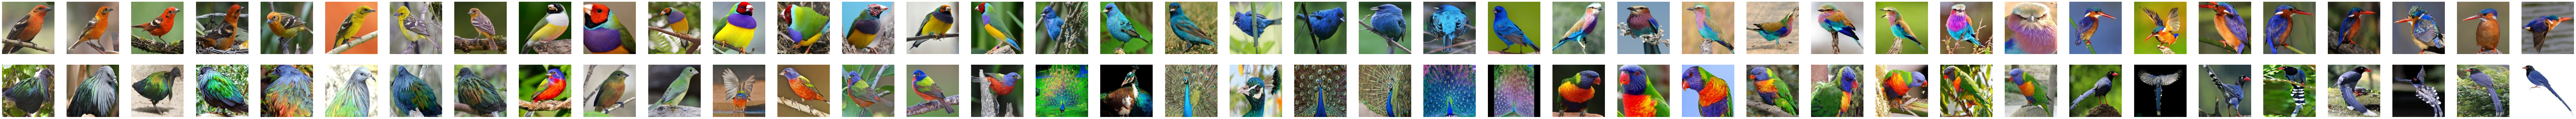

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_flame_pix = [os.path.join(train_flame_dir, fname) 
                for fname in train_flame_fnames[pic_index-8:pic_index]]
next_finch_pix = [os.path.join(train_finch_dir, fname) 
                for fname in train_finch_fnames[pic_index-8:pic_index]]
next_indigo_pix = [os.path.join(train_indigo_dir, fname) 
                for fname in train_indigo_fnames[pic_index-8:pic_index]]
next_lilac_pix = [os.path.join(train_lilac_dir, fname) 
                for fname in train_lilac_fnames[pic_index-8:pic_index]]
next_kingfisher_pix = [os.path.join(train_kingfisher_dir, fname) 
                for fname in train_kingfisher_fnames[pic_index-8:pic_index]]
next_pigeon_pix = [os.path.join(train_pigeon_dir, fname) 
                for fname in train_pigeon_fnames[pic_index-8:pic_index]]
next_buntig_pix = [os.path.join(train_buntig_dir, fname) 
                for fname in train_buntig_fnames[pic_index-8:pic_index]]
next_peacock_pix = [os.path.join(train_peacock_dir, fname) 
                for fname in train_peacock_fnames[pic_index-8:pic_index]]
next_lorikeet_pix = [os.path.join(train_lorikeet_dir, fname) 
                for fname in train_lorikeet_fnames[pic_index-8:pic_index]]
next_magpie_pix = [os.path.join(train_magpie_dir, fname) 
                for fname in train_magpie_fnames[pic_index-8:pic_index]]                                                                                                                                

for i, img_path in enumerate(next_flame_pix+next_finch_pix+next_indigo_pix+next_lilac_pix+next_kingfisher_pix+next_pigeon_pix+next_buntig_pix+next_peacock_pix+next_lorikeet_pix+next_magpie_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

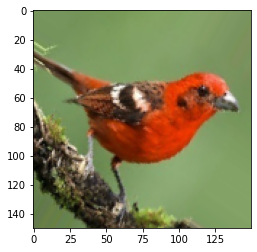

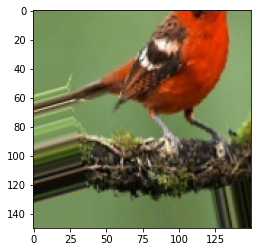

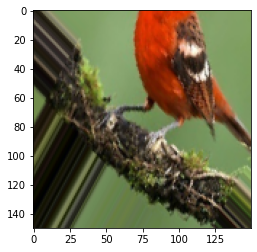

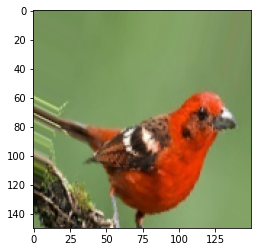

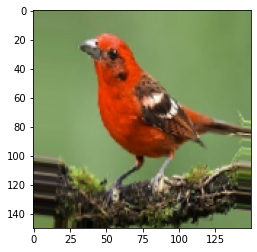

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_flame_dir, train_flame_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])



In [ ]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 1099 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=55,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
55/55 [==============================] - 31s 556ms/step - loss: 0.6426 - acc: 0.9141 - val_loss: 0.4257 - val_acc: 0.9115
Epoch 2/10
55/55 [==============================] - 31s 557ms/step - loss: 0.6836 - acc: 0.9142 - val_loss: 0.7573 - val_acc: 0.9135
Epoch 3/10
55/55 [==============================] - 31s 555ms/step - loss: 0.6256 - acc: 0.9130 - val_loss: 0.5153 - val_acc: 0.9170
Epoch 4/10
55/55 [==============================] - 31s 556ms/step - loss: 0.5880 - acc: 0.9134 - val_loss: 0.5396 - val_acc: 0.9145
Epoch 5/10
55/55 [==============================] - 31s 556ms/step - loss: 0.6127 - acc: 0.9148 - val_loss: 1.1419 - val_acc: 0.9065
Epoch 6/10
55/55 [==============================] - 31s 557ms/step - loss: 0.5571 - acc: 0.9159 - val_loss: 0.5501 - val_acc: 0.9095
Epoch 7/10
55/55 [==============================] - 31s 558ms/step - loss: 0.5761 - acc: 0.9144 - val_loss: 0.4407 - val_acc: 0.9110
Epoch 8/10
55/55 [==============================] - 31s 557ms/step - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


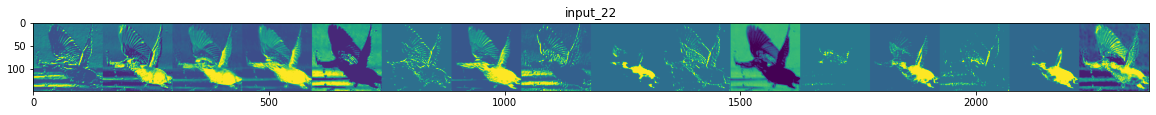

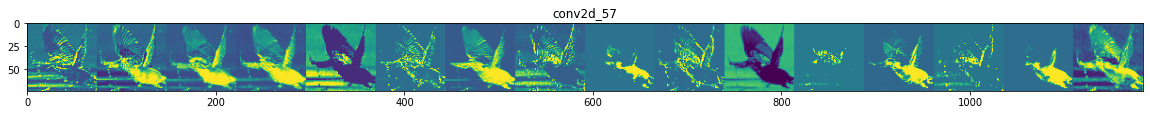

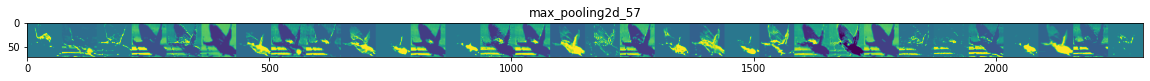

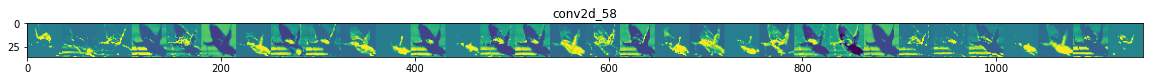

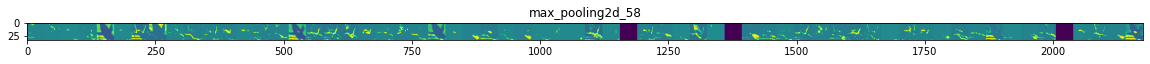

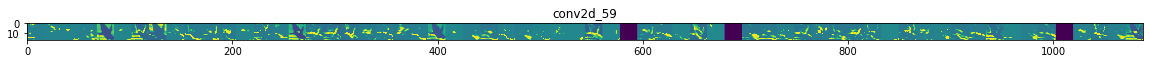

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
flame_img_files = [os.path.join(train_flame_dir, f) for f in train_flame_fnames]
finch_img_files = [os.path.join(train_finch_dir, f) for f in train_finch_fnames]
indigo_img_files = [os.path.join(train_indigo_dir, f) for f in train_indigo_fnames]
lilac_img_files = [os.path.join(train_lilac_dir, f) for f in train_lilac_fnames]
kingfisher_img_files = [os.path.join(train_kingfisher_dir, f) for f in train_kingfisher_fnames]
pigeon_img_files = [os.path.join(train_pigeon_dir, f) for f in train_pigeon_fnames]
buntig_img_files = [os.path.join(train_buntig_dir, f) for f in train_buntig_fnames]
peacock_img_files = [os.path.join(train_peacock_dir, f) for f in train_peacock_fnames]
lorikeet_img_files = [os.path.join(train_lorikeet_dir, f) for f in train_lorikeet_fnames]
magpie_img_files = [os.path.join(train_magpie_dir, f) for f in train_magpie_fnames]
img_path = random.choice(flame_img_files + finch_img_files + indigo_img_files + lilac_img_files + kingfisher_img_files + pigeon_img_files + buntig_img_files +
           peacock_img_files + lorikeet_img_files + magpie_img_files)             

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

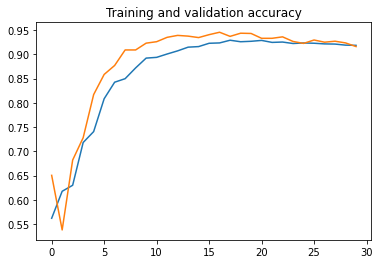

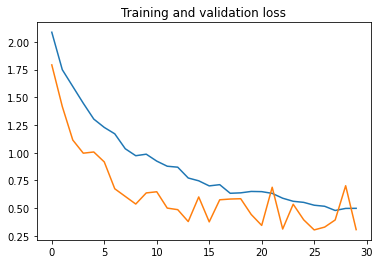

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')